In [62]:
import pandas as pd
import pyarrow
import geopandas
import matplotlib.pyplot as plt
import raster2xyz

In [63]:
# from parquet to csv
file = pd.read_parquet('../../finalproj_data/input_data/data_v3.parquet', engine = 'pyarrow')

In [64]:
file = file.loc[:,['lat', 'lon', 'label']]

In [65]:

file.head()

,lat,lon,label
0,-4.98565,106.360530,water
1,-4.98565,106.405485,water
2,-4.98565,106.450441,water
3,-4.98565,106.495396,water
4,-4.98565,106.540352,water


In [66]:
gdf = geopandas.GeoDataFrame(file, geometry=geopandas.points_from_xy(file.lon, file.lat))

In [67]:
gdf.head()

,lat,lon,label,geometry
0,-4.98565,106.360530,water,POINT (106.36053 -4.98565)
1,-4.98565,106.405485,water,POINT (106.40549 -4.98565)
2,-4.98565,106.450441,water,POINT (106.45044 -4.98565)
3,-4.98565,106.495396,water,POINT (106.49540 -4.98565)
4,-4.98565,106.540352,water,POINT (106.54035 -4.98565)


In [68]:
gdf['label'].value_counts()

water          661027
fwi_extreme    326049
land            35977
fwi_high         8951
burned           2234
active_fire       138
Name: label, dtype: int64

In [69]:
# Change to Numeric
gdf.loc[(gdf['label']=='water'), 'label'] = 0
gdf.loc[(gdf['label']=='land'), 'label'] = 1
gdf.loc[(gdf['label']=='burned'), 'label'] = 2
gdf.loc[(gdf['label']=='fwi_high'), 'label'] = 3
gdf.loc[(gdf['label']=='fwi_extreme'), 'label'] = 4
gdf.loc[(gdf['label']=='active_fire'), 'label'] = 5

In [70]:
gdf['label'].value_counts()

0    661027
4    326049
1     35977
3      8951
2      2234
5       138
Name: label, dtype: int64

### Plot

In [71]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
aus = world[world['name']=='Australia']

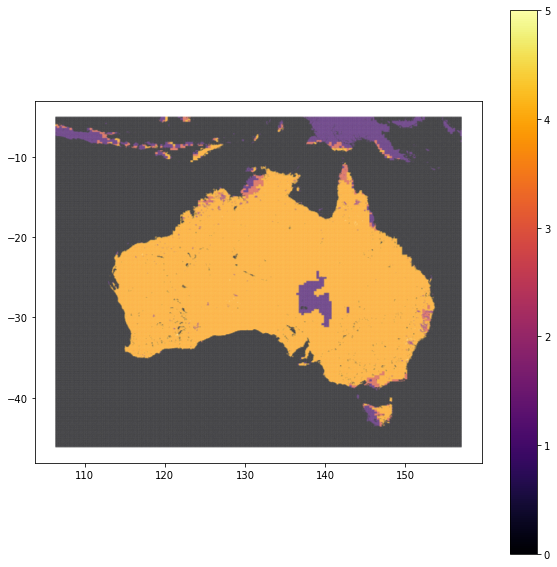

In [72]:
gdf.plot(['label'], markersize = 0.002, cmap = 'inferno', legend = True, figsize = (10, 10))

In [46]:
# gdf.to_file('../../finalproj_data/input_data/gdf.shp')